> This notebook loads raw data from the UCI dataset and converts it into MNE "Raw" objects, from which power spectral densities are extracted and are then split into bands in order to construct a Pandas DataFrame for use in our models.
> 
> In this first section, required libraries are imported, then there is exploration of data from a single EEG reading.

In [1]:
import numpy as np
import pandas as pd
import mne
from mne.time_frequency import psd_welch
from scipy.integrate import simps
import wget
import os
import tarfile

In [2]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364.tar.gz'
wget.download(filename, 'first.tar.gz')
tar = tarfile.open('first.tar.gz', 'r')
tar.extract('co2a0000364/co2a0000364.rd.000.gz')
tar.close()
data = np.genfromtxt('co2a0000364/co2a0000364.rd.000.gz', dtype=None, encoding=None)
df_raw = pd.DataFrame(data)
df_raw

100% [..........................................................................] 5726404 / 5726404

,f0,f1,f2,f3
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587
...,...,...,...,...
16379,0,Y,251,6.571
16380,0,Y,252,12.431
16381,0,Y,253,15.849
16382,0,Y,254,16.337


In [3]:
df_raw.f1.unique()

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

> Twelve channels are selected for use, based on those also used in the MPIL dataset and commonly used in low-cost EEG machines. The tracing can be viewed by means of the plot() method.

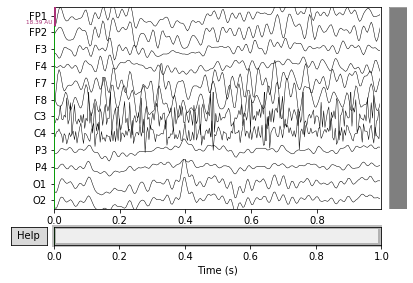

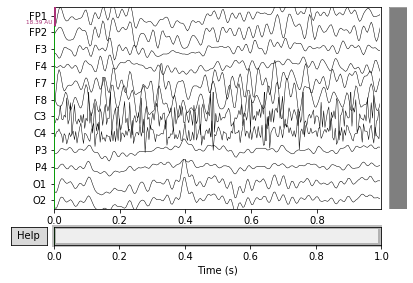

In [4]:
channels = ['FP1', 'FP2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
sfreq = 256
info = mne.create_info(channels, sfreq)
samples = []
for channel in channels:
    samples.append(list(df_raw.loc[df_raw['f1'] == channel]['f3']))
raw = mne.io.RawArray(samples, info, verbose=False)
raw.plot()

In [5]:
speclist = []
for channel in channels:
    spectra, freqs = psd_welch(raw, n_fft=256, picks=channel, verbose=False)
    speclist.append([channel] + spectra[0].tolist())
specdf = pd.DataFrame(speclist, columns = ['channel'] + list(freqs))
specdf

,channel,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
0,FP1,0.000342,15.084845,6.640021,1.180207,2.848368,0.532277,2.390596,0.718467,0.619361,...,0.000290,0.000032,0.000583,0.000672,0.000041,0.000064,0.000028,0.000190,0.000063,1.056398e-05
1,FP2,0.000188,13.079367,8.424738,1.267523,3.088149,0.404631,2.241615,0.797399,0.959532,...,0.000007,0.000224,0.000383,0.000063,0.000171,0.000013,0.000107,0.000247,0.000309,1.487784e-04
2,F3,0.035438,6.177029,2.065329,0.287262,0.783987,0.298523,0.398167,0.035682,0.243624,...,0.000156,0.000041,0.000314,0.000023,0.000009,0.000150,0.000102,0.000280,0.000633,3.913589e-07
3,F4,0.032863,2.087567,5.601713,0.818730,1.018281,0.062266,0.183310,0.085748,0.114658,...,0.000794,0.000113,0.000253,0.000490,0.000096,0.000171,0.000183,0.000041,0.000183,4.477980e-06
4,F7,0.000517,11.273314,0.444149,0.475836,1.770698,0.870970,1.847562,1.310629,1.063071,...,0.000002,0.000031,0.000424,0.000229,0.000022,0.000062,0.000025,0.000367,0.000066,1.217978e-05
5,F8,0.028883,5.064720,4.627305,1.551429,2.467327,0.215188,1.211021,0.479344,1.080809,...,0.000062,0.000260,0.000064,0.000068,0.000174,0.000040,0.000006,0.000167,0.000260,4.038062e-05
6,C3,0.007121,1.183950,0.285606,0.184645,0.674245,0.048693,0.169040,0.566848,0.093816,...,6.811019,0.359405,0.638669,6.402763,2.371892,0.060764,0.054086,1.871247,3.889084,3.091424e+00
7,C4,0.016909,1.670523,0.391065,0.069241,0.485680,0.006934,0.188540,0.037989,0.136798,...,0.742856,0.261069,1.338857,1.572520,0.026628,0.491791,0.101283,1.067393,1.333259,1.872364e-01
8,P3,0.031848,1.059009,4.405583,2.636179,0.370852,0.457668,0.111866,0.950032,0.252544,...,0.000255,0.000312,0.000282,0.000065,0.000154,0.000221,0.000094,0.000224,0.000076,1.127071e-06
9,P4,0.010710,1.008885,2.970792,3.250585,0.043506,0.268190,0.202484,0.433743,0.082340,...,0.000126,0.000247,0.000135,0.000374,0.000036,0.000287,0.000052,0.000021,0.000415,6.887522e-06


In [6]:
specdf.mean(axis=0)

0.0      0.017560
1.0      5.358730
2.0      4.238375
3.0      1.999129
4.0      1.230159
           ...   
124.0    0.046139
125.0    0.013020
126.0    0.245033
127.0    0.435375
128.0    0.273275
Length: 129, dtype: float64

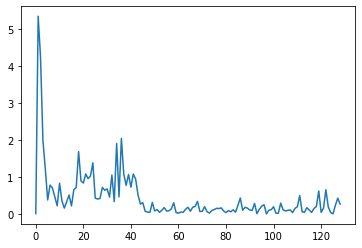

In [7]:
specdf.mean(axis=0).plot()

In [8]:
specdf.median(axis=0)

0.0      0.013809
1.0      3.307774
2.0      4.516444
3.0      1.223865
4.0      0.737428
           ...   
124.0    0.000107
125.0    0.000098
126.0    0.000207
127.0    0.000222
128.0    0.000026
Length: 129, dtype: float64

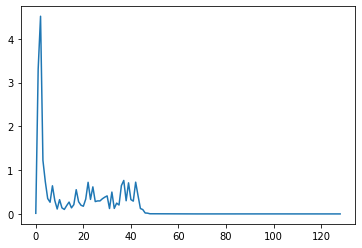

In [9]:
specdf.median(axis=0).plot()

> Mean and median spectral powers across channels are plotted above. From a preliminary more detailed exploration of the dataset (separately from this notebook) it was found that there were frequent large peaks at 1 Hz and 49 Hz. The 49 Hz peak is likely to be an AC electrical artefact, and I was unsure whether the 1 Hz peak was also an artefact. There is much variation in the ranges used for the named spectral bands, so in the cell below I have selected ranges that exclude these two values. Importation of the full dataset and extraction of absolute band powers then follows.

In [10]:
channels = ['FP1', 'FP2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
band_dict = {"delta": [1.5, 4], "theta": [4, 7], "alpha": [7, 12], "beta": [12, 30], "gamma": [30, 45]}
pairs = [('FP1', 'FP2'), ('F3', 'F4'), ('F7', 'F8'), ('C3', 'C4'), ('P3', 'P4'), ('O1', 'O2')]
idces = ['FP1', 'FP2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'FP1/FP2', 'F3/F4', 'F7/F8', 'C3/C4', 'P3/P4', 'O1/O2']
sfreq = 256

In [11]:
subjects = []
idces1 = []
for channel in channels:
    for band in band_dict.keys():
        idces1.append(channel + "a " + band)
for channel in channels:
    for band in band_dict.keys():
        idces1.append(channel + "r " + band)
for channel in idces[12:]:
    for band in band_dict.keys():
        idces1.append(channel + " " + band)
df1 = pd.DataFrame(index=subjects, columns=idces1)
display(df1)

,FP1a delta,FP1a theta,FP1a alpha,FP1a beta,FP1a gamma,FP2a delta,FP2a theta,FP2a alpha,FP2a beta,FP2a gamma,...,P3/P4 delta,P3/P4 theta,P3/P4 alpha,P3/P4 beta,P3/P4 gamma,O1/O2 delta,O1/O2 theta,O1/O2 alpha,O1/O2 beta,O1/O2 gamma


In [12]:
idces2 = ["subject"]
for channel in channels:
    for band in band_dict.keys():
        idces2.append(channel + " " + band)
df_abs_power = pd.DataFrame(index=[], columns=idces2)
display(df_abs_power)

,subject,FP1 delta,FP1 theta,FP1 alpha,FP1 beta,FP1 gamma,FP2 delta,FP2 theta,FP2 alpha,FP2 beta,...,O1 delta,O1 theta,O1 alpha,O1 beta,O1 gamma,O2 delta,O2 theta,O2 alpha,O2 beta,O2 gamma


In [13]:
if not os.path.exists('ucifolder'):
    os.makedirs('ucifolder')

In [14]:
subjects = []
k = 0
print("Loaded:")
for root in ['co2a0000', 'co2c0000', 'co2c1000', 'co3a0000', 'co3c0000']:
    for i in range(337, 463):
        subject = root + str(i)
        try:
            filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/" + subject + ".tar.gz"
            wget.download(filename, subject +'.tar.gz')
            tar = tarfile.open(subject + ".tar.gz", "r")
            tar.extractall(path='ucifolder')
            tar.close()
        except:
            pass
        else:
            for j in range(121):
                try:
                    data = np.genfromtxt("ucifolder/" + subject + "/" + subject + ".rd.{:03d}.gz".format(j), dtype=None, encoding=None)
                    df_raw = pd.DataFrame(data)
                    info = mne.create_info(channels, sfreq)
                    samples = []
                    for channel in channels:
                        samples.append(list(df_raw.loc[df_raw['f1'] == channel]['f3']))
                    raw = mne.io.RawArray(samples, info, verbose=False)
                    df_a = pd.DataFrame(index=[k], columns=idces2)
                    k += 1
                    df_a['subject'] = subject
                    for channel in channels:
                        spectra, freqs = psd_welch(raw, fmin=1.5, fmax=45, n_fft=256, picks=channel, verbose=False)
                        for band, lims in band_dict.items():
                            low, high = lims
                            idx_band = np.logical_and(freqs > low, freqs <= high)
                            freq_res = freqs[1] - freqs[0]
                            abs_power = simps(spectra[0][idx_band], dx=freq_res)
                            df_a[channel + " " + band] = abs_power
                    df_abs_power = df_abs_power.append(df_a)
                    os.remove("ucifolder/" + subject + "/" + subject + ".rd.{:03d}.gz".format(j))
                except:
                    pass
            subjects.append(subject)
            print(subject, end=" ")

Loaded:
100% [..........................................................................] 6839911 / 6839911co2a0000364 co2a0000365 co2a0000368 co2a0000369 co2a0000370 co2a0000371 co2a0000372 co2a0000375 co2a0000377 co2a0000378 co2a0000379 co2a0000380 co2a0000381 co2a0000382 co2a0000384 co2a0000385 co2a0000386 co2a0000387 co2a0000388 co2a0000390 co2a0000392 co2a0000394 co2a0000395 co2a0000396 co2a0000398 co2a0000400 co2a0000402 co2a0000403 co2a0000404 co2a0000405 co2a0000406 co2a0000407 co2a0000409 co2a0000410 co2a0000411 co2a0000412 co2a0000414 co2a0000415 co2a0000416 co2a0000417 co2a0000418 co2a0000419 co2a0000421 co2a0000422 co2a0000423 co2a0000424 co2a0000425 co2a0000426 co2a0000427 co2a0000428 co2a0000429 co2a0000430 co2a0000432 co2a0000433 co2a0000434 co2a0000435 co2a0000436 co2a0000437 co2a0000438 co2a0000439 co2a0000440 co2a0000443 co2a0000444 co2a0000445 co2a0000447 co2c0000337 co2c0000338 co2c0000339 co2c0000340 co2c0000341 co2c0000342 co2c0000344 co2c0000345 co2c0000346 co2c0

C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.004.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.005.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.006.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.023.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.029.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: genfromtxt: Empty input file: "ucifolder/co2c1000367/co2c1000367.rd.037.gz"
C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launch

100% [..........................................................................] 6649598 / 6649598co3a0000448 co3a0000450 co3a0000451 co3a0000453 co3a0000454 co3a0000455 co3a0000456 co3a0000457 co3a0000458 co3a0000459 co3a0000460 co3a0000461 co3c0000402 

In [15]:
df_abs_power

,subject,FP1 delta,FP1 theta,FP1 alpha,FP1 beta,FP1 gamma,FP2 delta,FP2 theta,FP2 alpha,FP2 beta,...,O1 delta,O1 theta,O1 alpha,O1 beta,O1 gamma,O2 delta,O2 theta,O2 alpha,O2 beta,O2 gamma
0,co2a0000364,4.736405,3.604376,0.393431,8.301208,9.452939,5.527660,3.389497,0.730715,17.867095,...,11.488697,1.263690,6.167887,8.158896,7.153791,10.273527,0.972335,4.244589,5.769434,4.972614
1,co2a0000364,475.971653,194.104816,43.135315,8.673612,4.047897,412.086058,179.304912,47.522498,30.394860,...,42.606237,6.894447,3.326318,5.476983,4.680068,48.257036,5.982482,3.141227,4.413714,2.518863
2,co2a0000364,149.169447,51.300052,8.684440,5.489449,4.847781,139.354207,48.592740,8.902157,9.169070,...,10.961654,5.269759,4.216761,12.147997,5.865972,12.433722,5.136757,3.002670,8.428338,4.884207
3,co2a0000364,2.044060,2.250148,0.828324,5.337087,5.385649,3.356098,3.493995,1.272312,10.039948,...,3.088831,1.844728,3.217884,16.525091,5.588533,1.910843,1.784831,1.398576,7.752070,2.181865
4,co2a0000364,289.116970,52.326824,12.886080,8.719825,2.762509,223.867632,40.530986,10.848462,23.042398,...,25.046732,4.835623,5.364594,9.067731,2.879877,22.815090,4.545804,4.657753,7.409154,2.081961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11052,co3c0000402,2.469781,2.062545,2.511288,2.331180,0.301455,1.500529,1.986647,2.283318,2.156081,...,1.440598,10.874150,3.729531,3.080377,0.468907,3.654726,7.662580,4.976425,4.525729,0.460418
11053,co3c0000402,6.405068,0.324077,0.730855,2.107742,0.241586,7.126029,0.598102,0.624135,2.949109,...,2.285371,1.634784,6.720269,5.351813,0.358602,2.369594,1.643022,7.448491,4.454435,0.436218
11054,co3c0000402,6.165464,0.725280,0.957431,1.153180,0.498152,6.613766,0.555861,1.050670,1.594312,...,3.680612,1.915709,2.785410,1.769356,0.729056,4.290867,1.624870,2.194642,1.959716,0.316536
11055,co3c0000402,4.671193,11.115634,0.678920,3.421796,0.572963,1.899831,8.572494,0.438840,2.677681,...,2.803384,1.499249,4.155282,2.059485,0.354529,2.470384,1.315166,4.061475,1.770184,0.417685


In [16]:
df_abs_power.to_csv('EEG_UCI_abs_power.csv', index=True)

> In the next cells I have added relative powers and power lateralisation variables. For the lateralisation variables the calculation is left-sided power as a proportion of the sum of powers from both sides. The channel names are then adjusted to match those in the MPIL dataset, and the full set of band power data containing 150 input features is saved as a CSV file. The subject class is identified by the fourth character in the subject name &ndash; "a" for alcoholic subjects and "c" for controls.

In [17]:
for subject in subjects:
    df_sub = pd.DataFrame(index=[subject], columns=idces1)
    total_power = 0
    for band in band_dict.keys():
        for channel in channels:
            df_sub[channel + "a " + band][subject] = (df_abs_power.loc[df_abs_power['subject'] == subject][channel + " " + band]).median()
            total_power += df_sub[channel + "a " + band][subject]
    for band in band_dict.keys():
        for channel in channels:
            df_sub[channel + "r " + band][subject] = df_sub[channel + "a " + band][subject] / total_power
        for pair in pairs:
            left, right = pair
            df_sub[left + "/" + right + " " + band] = df_sub[left + "a " + band][subject] / (df_sub[left + "a " + band][subject] + df_sub[right + "a " + band][subject])
    df1 = df1.append(df_sub)
df1

C:\Users\timk\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,FP1a delta,FP1a theta,FP1a alpha,FP1a beta,FP1a gamma,FP2a delta,FP2a theta,FP2a alpha,FP2a beta,FP2a gamma,...,P3/P4 delta,P3/P4 theta,P3/P4 alpha,P3/P4 beta,P3/P4 gamma,O1/O2 delta,O1/O2 theta,O1/O2 alpha,O1/O2 beta,O1/O2 gamma
co2a0000364,34.9515,6.32976,1.57744,5.04098,2.69555,30.6294,6.10516,2.18795,13.4588,8.08491,...,0.459534,0.554567,0.547984,0.579646,0.637105,0.518184,0.540152,0.546512,0.580773,0.634882
co2a0000365,9.29979,2.56855,8.27299,10.2447,4.96043,7.65018,2.81624,7.80538,6.147,1.62118,...,0.481977,0.456597,0.477621,0.494127,0.489962,0.465665,0.490152,0.462667,0.486200,0.528533
co2a0000368,3.51503,1.54196,5.43365,2.41124,0.941431,3.76863,1.35877,5.55137,2.4152,0.995425,...,0.458276,0.450038,0.563601,0.481220,0.480997,0.438477,0.458350,0.504987,0.474034,0.360506
co2a0000369,4.79595,4.36056,18.9347,3.81862,0.956625,4.47278,4.25617,18.1582,3.58234,0.778637,...,0.563004,0.503810,0.528841,0.496117,0.521641,0.530270,0.528711,0.517796,0.546580,0.520409
co2a0000370,3.73651,1.39297,5.37806,4.3742,1.30656,4.511,1.35362,5.03437,5.87183,3.259,...,0.414734,0.428938,0.371896,0.451796,0.560019,0.467281,0.505975,0.513976,0.594723,0.724742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
co3a0000458,5.03428,1.29736,2.77622,7.50379,1.38979,6.73238,1.79162,3.07297,8.0304,1.45631,...,0.488738,0.554300,0.502656,0.517526,0.541235,0.461837,0.480084,0.494039,0.503561,0.577265
co3a0000459,4.92595,1.28404,3.81827,4.60254,1.25618,4.73008,1.29765,3.81283,8.84502,3.53807,...,0.521518,0.476234,0.598763,0.568120,0.557745,0.508269,0.549875,0.526056,0.553384,0.539971
co3a0000460,5.41355,2.57762,2.85399,3.19214,0.737959,5.67454,2.72377,2.88598,3.20846,0.764771,...,0.522837,0.545288,0.595220,0.539650,0.551718,0.521833,0.565657,0.516360,0.473023,0.439638
co3a0000461,7.39963,1.50702,1.85614,2.52872,0.567038,5.50539,1.31272,2.25069,2.52448,0.576788,...,0.473300,0.605074,0.520692,0.566241,0.594854,0.525616,0.526378,0.529584,0.537405,0.588164


In [18]:
df1 = df1.rename(columns={'FP1a delta': 'Fp1a delta', 'FP1a theta': 'Fp1a theta', 'FP1a alpha': 'Fp1a alpha', 'FP1a beta': 'Fp1a beta', 'FP1a gamma': 'Fp1a gamma',
                          'FP2a delta': 'Fp2a delta', 'FP2a theta': 'Fp2a theta', 'FP2a alpha': 'Fp2a alpha', 'FP2a beta': 'Fp2a beta', 'FP2a gamma': 'Fp2a gamma',
                          'FP1r delta': 'Fp1r delta', 'FP1r theta': 'Fp1r theta', 'FP1r alpha': 'Fp1r alpha', 'FP1r beta': 'Fp1r beta', 'FP1r gamma': 'Fp1r gamma',
                          'FP2r delta': 'Fp2r delta', 'FP2r theta': 'Fp2r theta', 'FP2r alpha': 'Fp2r alpha', 'FP2r beta': 'Fp2r beta', 'FP2r gamma': 'Fp2r gamma',
                          'FP1/FP2 delta': 'Fp1/Fp2 delta', 'FP1/FP2 theta': 'Fp1/Fp2 theta', 'FP1/FP2 alpha': 'Fp1/Fp2 alpha', 'FP1/FP2 beta': 'Fp1/Fp2 beta','FP1/FP2 gamma': 'Fp1/Fp2 gamma'})
df1

,Fp1a delta,Fp1a theta,Fp1a alpha,Fp1a beta,Fp1a gamma,Fp2a delta,Fp2a theta,Fp2a alpha,Fp2a beta,Fp2a gamma,...,P3/P4 delta,P3/P4 theta,P3/P4 alpha,P3/P4 beta,P3/P4 gamma,O1/O2 delta,O1/O2 theta,O1/O2 alpha,O1/O2 beta,O1/O2 gamma
co2a0000364,34.9515,6.32976,1.57744,5.04098,2.69555,30.6294,6.10516,2.18795,13.4588,8.08491,...,0.459534,0.554567,0.547984,0.579646,0.637105,0.518184,0.540152,0.546512,0.580773,0.634882
co2a0000365,9.29979,2.56855,8.27299,10.2447,4.96043,7.65018,2.81624,7.80538,6.147,1.62118,...,0.481977,0.456597,0.477621,0.494127,0.489962,0.465665,0.490152,0.462667,0.486200,0.528533
co2a0000368,3.51503,1.54196,5.43365,2.41124,0.941431,3.76863,1.35877,5.55137,2.4152,0.995425,...,0.458276,0.450038,0.563601,0.481220,0.480997,0.438477,0.458350,0.504987,0.474034,0.360506
co2a0000369,4.79595,4.36056,18.9347,3.81862,0.956625,4.47278,4.25617,18.1582,3.58234,0.778637,...,0.563004,0.503810,0.528841,0.496117,0.521641,0.530270,0.528711,0.517796,0.546580,0.520409
co2a0000370,3.73651,1.39297,5.37806,4.3742,1.30656,4.511,1.35362,5.03437,5.87183,3.259,...,0.414734,0.428938,0.371896,0.451796,0.560019,0.467281,0.505975,0.513976,0.594723,0.724742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
co3a0000458,5.03428,1.29736,2.77622,7.50379,1.38979,6.73238,1.79162,3.07297,8.0304,1.45631,...,0.488738,0.554300,0.502656,0.517526,0.541235,0.461837,0.480084,0.494039,0.503561,0.577265
co3a0000459,4.92595,1.28404,3.81827,4.60254,1.25618,4.73008,1.29765,3.81283,8.84502,3.53807,...,0.521518,0.476234,0.598763,0.568120,0.557745,0.508269,0.549875,0.526056,0.553384,0.539971
co3a0000460,5.41355,2.57762,2.85399,3.19214,0.737959,5.67454,2.72377,2.88598,3.20846,0.764771,...,0.522837,0.545288,0.595220,0.539650,0.551718,0.521833,0.565657,0.516360,0.473023,0.439638
co3a0000461,7.39963,1.50702,1.85614,2.52872,0.567038,5.50539,1.31272,2.25069,2.52448,0.576788,...,0.473300,0.605074,0.520692,0.566241,0.594854,0.525616,0.526378,0.529584,0.537405,0.588164


In [19]:
df1.to_csv('EEG_UCI_dataset_powers.csv', index=True)